

```
# This is formatted as code
```

# Population growth in the United States



In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


link to github page https://github.com/slewis3418/slewis3418.github.io/blob/main/Yet_another_copy_of_milestone1%20(1).html
`

For my project, I will focus on the population growth trends in the United States, and compare that to indicators of econmic health and growth, such as per capita income. My main data set is [NCS data](https://www.census.gov/data/tables/time-series/demo/popest/2020s-national-total.html) from the census bureau website, which shows states population by year. Using this, I can compute growth from year to year, and compare them by both region and state. Aditionally, I can use [ACS data](https://data.census.gov/table/ACSDT1Y2023.B19301?q=b19301&g=010XX00US$0400000), which shows average household income by state, to break down how different states are doing econonically, and compare this to population growth.

In [ ]:
import pandas as pd
df_NST = pd.read_csv("/content/drive/My Drive/NST-EST2024-ALLDATA.csv")
df_NST.head()
df_NST


,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
0,10,0,0,0,United States,331515736,331577720,332099760,334017321,336806231,...,6.840246,8.231786,0.000000,0.000000,0.000000,0.000000,1.133093,5.084797,6.840246,8.231786
1,20,1,0,0,Northeast Region,57617706,57431458,57252533,57159597,57398303,...,8.175150,9.848371,-4.674375,-7.824957,-4.857718,-3.334322,-3.271477,-2.006798,3.317432,6.514050
2,30,1,1,0,New England,15122011,15057350,15118145,15175633,15263573,...,8.005202,9.622685,2.416795,-2.957175,-2.067991,-1.575091,4.188365,4.325839,5.937211,8.047594
3,30,1,2,0,Middle Atlantic,42495695,42374108,42134388,41983964,42134730,...,8.236647,9.930153,-7.206423,-9.578005,-5.867209,-3.971810,-5.935167,-4.287388,2.369438,5.958342
4,20,2,0,0,Midwest Region,68998970,68984258,68872831,68903297,69186401,...,4.859117,5.861482,-2.502867,-2.649762,-1.300416,-0.709222,-1.700819,0.891824,3.558701,5.152260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,40,4,9,53,Washington,7707586,7727209,7743760,7794123,7857320,...,8.570200,10.316588,-2.028057,-0.444333,-2.209764,0.337770,-0.219379,5.160549,6.360436,10.654358
62,40,3,5,54,West Virginia,1793736,1791646,1785618,1774122,1770495,...,1.309027,1.604870,1.668314,0.162371,1.859721,2.553330,2.074770,1.102328,3.168749,4.158200
63,40,2,3,55,Wisconsin,5894170,5897375,5881608,5903975,5930405,...,3.083727,3.724715,-3.158677,1.273081,1.298758,1.064973,-2.617204,4.614960,4.382486,4.789688
64,40,4,8,56,Wyoming,576844,577681,579636,581978,585067,...,1.777138,2.191552,3.126196,4.216547,2.983604,1.468425,3.362951,5.165227,4.760742,3.659977


In [ ]:

percent_change = ((df_NST['POPESTIMATE2023'] - df_NST['POPESTIMATE2021'])/df_NST['POPESTIMATE2021'])*100
percent_change.describe()


,0
count,66.000000
mean,1.225981
std,1.295592
min,-1.805830
25%,0.348190
50%,0.949175
75%,2.175937
max,4.914444


Above, is the percent change in population, between the years 2021 and 2023. We see the mean state income population growth is around 1.22 %.

In [ ]:

southeast_states = df_NST[
    (df_NST['NAME'] == 'Alabama') |
    (df_NST['NAME'] == 'Arkansas') |
    (df_NST['NAME'] == 'Florida') |
    (df_NST['NAME'] == 'Georgia') |
    (df_NST['NAME'] == 'Kentucky') |
    (df_NST['NAME'] == 'Louisiana') |
    (df_NST['NAME'] == 'Mississippi') |
    (df_NST['NAME'] == 'North Carolina') |
    (df_NST['NAME'] == 'South Carolina') |
    (df_NST['NAME'] == 'Tennessee') |
    (df_NST['NAME'] == 'Virginia') |
    (df_NST['NAME'] == 'West Virginia')
]

southeast_states.head()


,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
14,40,3,6,1,Alabama,5025369,5033094,5049196,5076181,5117673,...,2.549575,3.068113,4.993905,5.575299,5.875305,5.066094,5.351760,7.186103,8.424880,8.134207
17,40,3,7,5,Arkansas,3011553,3014546,3026870,3047704,3069463,...,1.623627,1.998111,5.257046,6.213769,5.826553,4.373303,5.702968,8.247492,7.450181,6.371414
23,40,3,5,12,Florida,21538192,21592035,21831949,22379312,22904868,...,15.113932,17.776488,11.356443,14.225652,8.173583,2.766683,13.514375,25.802566,23.287515,20.543170
24,40,3,5,13,Georgia,10713755,10732888,10792060,10931805,11064432,...,4.722717,5.672027,3.380635,7.355137,4.754450,2.276525,4.324377,11.464350,9.477166,7.948552
31,40,3,6,21,Kentucky,4506302,4508318,4507583,4519233,4550595,...,5.768797,6.878239,0.599829,2.312886,1.609071,1.596242,0.989141,4.783082,7.377869,8.474481


In [ ]:
pop_se_2023 = southeast_states['POPESTIMATE2023']
pop_se_2023.describe()
pop_se_2021 = southeast_states['POPESTIMATE2021']
pop_se_2021.describe()
pop_se_change = ((pop_se_2023 - pop_se_2021)/pop_se_2021)*100
pop_se_change.describe()

,0
count,12.000000
mean,1.627628
std,1.795388
min,-0.862149
25%,0.622088
50%,1.381680
75%,2.715520
max,4.914444


Above, I created an indicator of all the southeastern states in the United States. Then, after finding the mean I calculated the population change between the years of 2023 and 2021. From this, we can see that the population in the southeast is increasing slightly more than the population of the rest of the country between these two years. IN the south, the population increased by about 1.62%, where as it increased by about 1.22% across the whole country.

In [ ]:
percent_change2 = ((df_NST['RINTERNATIONALMIG2023'] - df_NST['RINTERNATIONALMIG2024'])/df_NST['RINTERNATIONALMIG2023'])
percent_change2.describe()

,0
count,66.000000
mean,4.088176
std,34.896813
min,-0.354780
25%,-0.209164
50%,-0.204223
75%,-0.199020
max,283.295667


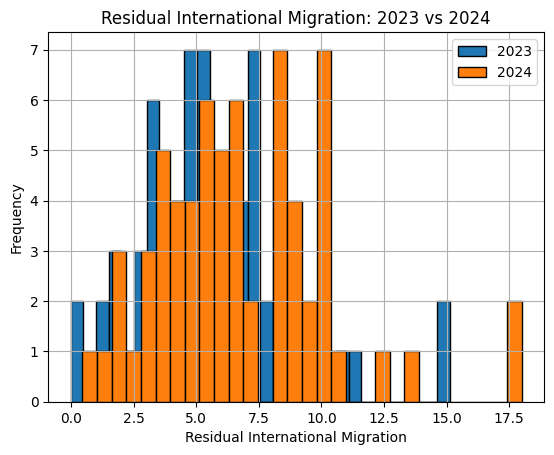

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_NST['RINTERNATIONALMIG2023'], bins=30, label='2023', edgecolor='black')
plt.hist(df_NST['RINTERNATIONALMIG2024'], bins=30, label='2024', edgecolor='black')

plt.title('Residual International Migration: 2023 vs 2024')
plt.xlabel('Residual International Migration')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Using ACS data, we can see the average household income by state for the year 2023 and 2021.

In [ ]:
percent_change = ((df_NST['POPESTIMATE2023'] - df_NST['POPESTIMATE2021']) / df_NST['POPESTIMATE2021']) * 100

df_NST['percent_change'] = percent_change
northeast_states = df_NST[
    (df_NST['NAME'] == 'Connecticut') |
    (df_NST['NAME'] == 'Maine') |
    (df_NST['NAME'] == 'Massachusetts') |
    (df_NST['NAME'] == 'New Hampshire') |
    (df_NST['NAME'] == 'Rhode Island') |
    (df_NST['NAME'] == 'Vermont') |
    (df_NST['NAME'] == 'New Jersey') |
    (df_NST['NAME'] == 'New York') |
    (df_NST['NAME'] == 'Pennsylvania')
]
northeast_states.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024,percent_change
20,40,1,1,9,Connecticut,3607701,3579918,3606607,3617925,3643023,...,9.897115,5.400663,-2.880740,-1.779933,-1.656169,7.130289,3.307896,6.474637,8.240946,1.009702
33,40,1,1,23,Maine,1363196,1364571,1378931,1390922,1399646,...,3.705265,13.133579,10.382500,6.878886,3.800107,13.871322,12.732806,9.944212,7.505371,1.502251
35,40,1,1,25,Massachusetts,7033132,6994598,7000474,7022468,7066568,...,12.704169,-2.102597,-7.821896,-5.191555,-3.869676,0.251803,2.574210,5.399660,8.834493,0.944136
43,40,1,1,33,New Hampshire,1377546,1378756,1387677,1396678,1402199,...,3.052044,6.165340,7.190893,3.194138,3.478192,7.280133,8.295638,5.680850,6.530235,1.046497
44,40,1,2,34,New Jersey,9289014,9272794,9270541,9295227,9379642,...,13.844130,-3.519108,-7.192700,-5.156448,-3.766215,-1.928995,0.661432,6.403793,10.077915,1.176857


In [ ]:
midwest_states = df_NST[
    (df_NST['NAME'] == 'Illinois') |
    (df_NST['NAME'] == 'Indiana') |
    (df_NST['NAME'] == 'Iowa') |
    (df_NST['NAME'] == 'Kansas') |
    (df_NST['NAME'] == 'Michigan') |
    (df_NST['NAME'] == 'Minnesota') |
    (df_NST['NAME'] == 'Missouri') |
    (df_NST['NAME'] == 'Nebraska') |
    (df_NST['NAME'] == 'North Dakota') |
    (df_NST['NAME'] == 'Ohio') |
    (df_NST['NAME'] == 'South Dakota') |
    (df_NST['NAME'] == 'Wisconsin')
]
west_states = df_NST[
    (df_NST['NAME'] == 'Alaska') |
    (df_NST['NAME'] == 'Arizona') |
    (df_NST['NAME'] == 'California') |
    (df_NST['NAME'] == 'Colorado') |
    (df_NST['NAME'] == 'Hawaii') |
    (df_NST['NAME'] == 'Idaho') |
    (df_NST['NAME'] == 'Montana') |
    (df_NST['NAME'] == 'Nevada') |
    (df_NST['NAME'] == 'New Mexico') |
    (df_NST['NAME'] == 'Oregon') |
    (df_NST['NAME'] == 'Utah') |
    (df_NST['NAME'] == 'Washington') |
    (df_NST['NAME'] == 'Wyoming')
]


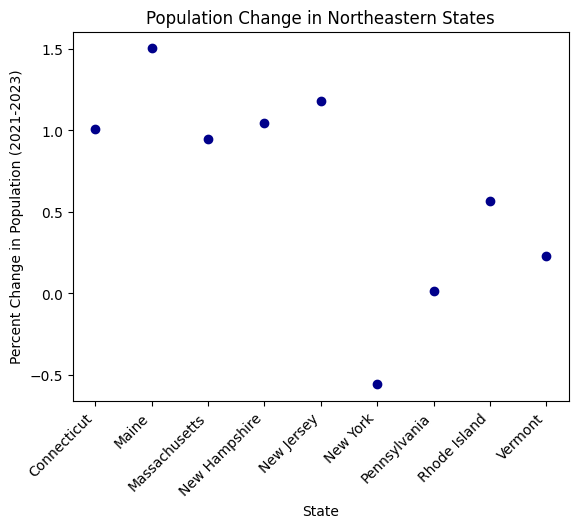

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(northeast_states['NAME'], northeast_states['percent_change'], color='darkblue')
plt.xlabel("State")
plt.ylabel("Percent Change in Population (2021-2023)")
plt.title("Population Change in Northeastern States")
plt.xticks(rotation=45, ha='right')
plt.show()

Above, we can see the breakdown in percent change in population by state's in the northeast between 2021 and 2023. We can see that all states besides New York have a growing population, with Maine having the highest population growth rate.

In [ ]:

acs2023 = pd.read_csv("/content/drive/My Drive/ACS2023.csv")
acs2023
acs2021 = pd.read_csv("/content/drive/My Drive/ACS2021.csv")
acs2021
acs2023 = acs2023.drop(columns=['Unnamed: 4'])
acs2021 = acs2021.drop(columns=['Unnamed: 4'])
acs2023.head()
acs2021.head()

,GEO_ID,NAME,B19013_001E,B19013_001M
0,Geography,Geographic Area Name,Estimate!!Median household income in the past ...,Margin of Error!!Median household income in th...
1,0400000US01,Alabama,53913,781
2,0400000US02,Alaska,77845,2148
3,0400000US04,Arizona,69056,686
4,0400000US05,Arkansas,52528,1002


Above, we can see the average income of every state in the year 2021 and 2023, below, we can see the percent growth of average household income in louisiana.

In [ ]:
la_2021 = float(acs2021[acs2021['NAME'] == 'Louisiana'].iloc[0]['B19013_001E'])
la_2023 = float(acs2023[acs2023['NAME'] == 'Louisiana'].iloc[0]['B19013_001E'])
la_change = ((la_2023 - la_2021) / la_2021)
la_change

0.11791809856586097

We can see that louisianas household income increased by 11% between 2021 and 2023.

In [ ]:
acs2023_2 = acs2023.iloc[1:].copy()
acs2023_2['State'] = acs2023['NAME'].str.replace(r' -.*', '', regex=True).str.strip()
acs2023_2['MedianIncome'] = pd.to_numeric(acs2023['B19013_001E'], errors='coerce')
acs2023_2 = acs2023_2[['State', 'MedianIncome']]

In [ ]:
df_NST_2 = df_NST[df_NST['SUMLEV'] == 40].copy()
df_NST_2['State'] = df_NST['NAME'].str.strip()
df_NST_2 = df_NST_2[['State', 'POPESTIMATE2023']]

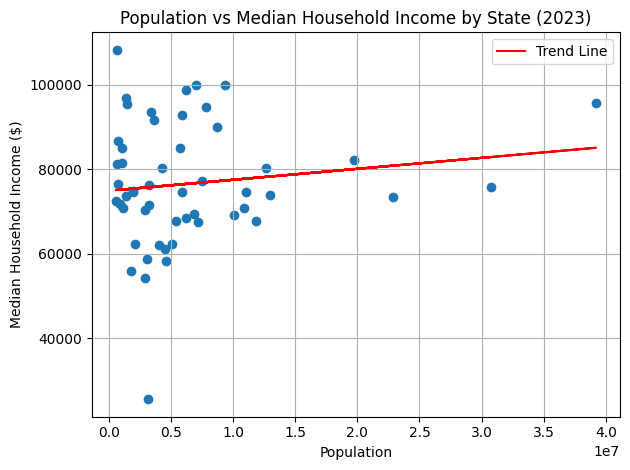

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



merged_df = pd.merge(df_NST_2, acs2023_2, on='State', how='inner')
merged_df.dropna(inplace=True)


merged_df = pd.merge(df_NST_2, acs2023_2, on='State', how='outer')

merged_df.dropna(inplace=True)

merged_df.head()
x = merged_df['POPESTIMATE2023']
y = merged_df['MedianIncome']
m, b = np.polyfit(x, y, 1)


plt.scatter(x, y)
plt.plot(x, m * x + b, color='red', label='Trend Line')
plt.title("Population vs Median Household Income by State (2023)")
plt.xlabel("Population")
plt.ylabel("Median Household Income ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The above graph shows the relation between population and median household income in a state, as well as trend line which highlights a slight positive relation between the values.

In [ ]:


northeast_states.loc[:, 'Region'] = 'Northeast'
midwest_states.loc[:, 'Region'] = 'Midwest'
west_states.loc[:, 'Region'] = 'West'
southeast_states.loc[:, 'Region'] = 'Southeast'

<ipython-input-20-f4d2b6e2fd08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northeast_states.loc[:, 'Region'] = 'Northeast'
<ipython-input-20-f4d2b6e2fd08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midwest_states.loc[:, 'Region'] = 'Midwest'
<ipython-input-20-f4d2b6e2fd08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
state_to_region = {
    'Alabama': 'South', 'Arkansas': 'South', 'Florida': 'South', 'Georgia': 'South',
    'Kentucky': 'South', 'Louisiana': 'South', 'Mississippi': 'South',
    'North Carolina': 'South', 'South Carolina': 'South', 'Tennessee': 'South',
    'Virginia': 'South', 'West Virginia': 'South',
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest',
    'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest', 'Nebraska': 'Midwest',
    'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'South Dakota': 'Midwest', 'Wisconsin': 'Midwest',
    'Alaska': 'West', 'Arizona': 'West', 'California': 'West', 'Colorado': 'West',
    'Hawaii': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West',
    'New Mexico': 'West', 'Oregon': 'West', 'Utah': 'West', 'Washington': 'West', 'Wyoming': 'West'
}



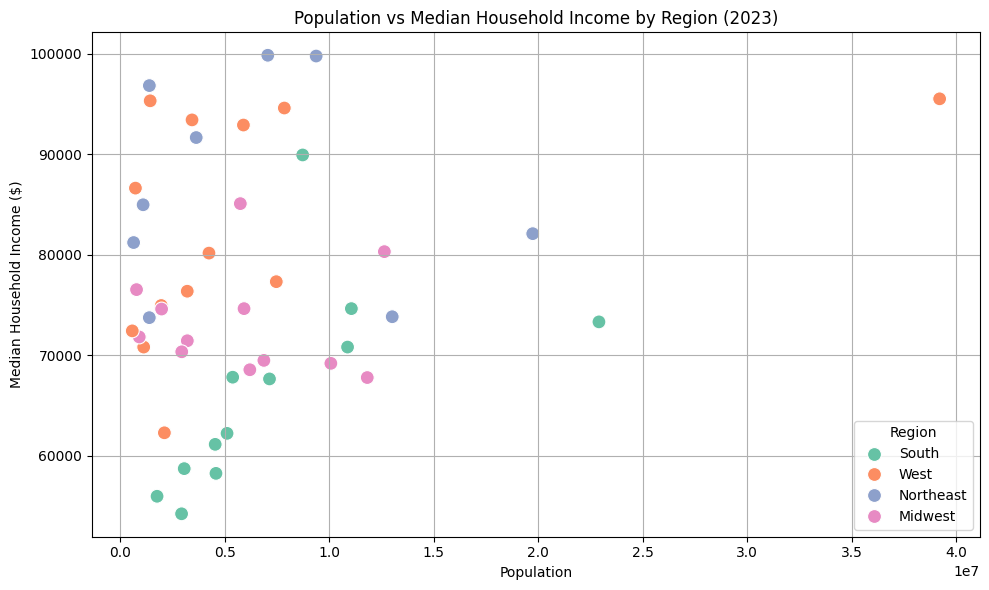

In [ ]:


merged_df['Region'] = merged_df['State'].map(state_to_region)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='POPESTIMATE2023',
    y='MedianIncome',
    hue='Region',
    palette='Set2',
    s=100,
)

plt.title("Population vs Median Household Income by Region (2023)")
plt.xlabel("Population")
plt.ylabel("Median Household Income ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


This is the same as the graph above, however it shows the different regions each of the state are in. I had to remap the states to the regions in order to make it work.

In [ ]:
region_medians = merged_df.groupby('Region')[['POPESTIMATE2023', 'MedianIncome']].median().reset_index()
region_medians


,Region,POPESTIMATE2023,MedianIncome
0,Midwest,5841726.5,71621.5
1,Northeast,3643023.0,84972.0
2,South,5252751.5,64921.5
3,West,3214363.0,80160.0


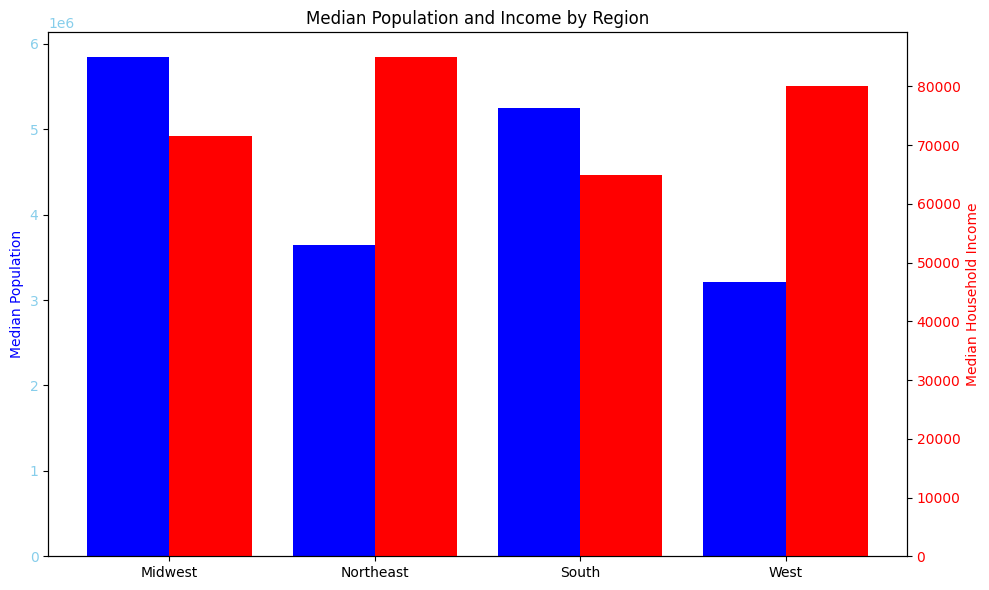

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(region_medians['Region']))
x = region_medians['Region']
bar_width = 0.4

ax1.bar(x_pos - bar_width/2, region_medians['POPESTIMATE2023'], width=bar_width, label='Population', color='blue')
ax1.set_ylabel('Median Population', color='blue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.bar(x_pos + bar_width/2, region_medians['MedianIncome'], width=bar_width, label='Median Income', color='red')
ax2.set_ylabel('Median Household Income', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(x)
plt.title('Median Population and Income by Region')
plt.tight_layout()
plt.show()


This graph shows both the median population and income by region, allowing us to view the differences in these statistics depending on the region.

For my model, I could predict the income of a county or state based on both the region the county or the state is in as well as its population. It could be useful to do this at the county level rather then the state level since it would give me more data points to build my model off of. I could also build a model on the opposite principles, predicting population based off of a county or states income. Another idea could be to predicate the change a states per capita income based on change in states population between 2021 and 2023.  Regardless of if I build my model at the county or the state level, the principle is the same, as well as the data source.